# 15 - CÓDIGO DE EJECUCIÓN

## IMPORTAR LOS PAQUETES

In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Métricas de evaluación
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import cloudpickle
import joblib

## CARGAR LOS DATOS

In [21]:
df = pd.read_csv('../../02_Datos/02_Validacion/validacion.csv', index_col= 0).reset_index()
df.drop(columns= 'index', inplace= True)
val_y = df.mpg.copy()

## CODIGO DE EJECUCIÓN

In [22]:
#Cambiamos los nulos '?' por nan
df['caballos'] = df.caballos.replace({'?':np.nan})
#Cambiamos el tipo de variable
df = df.astype({'caballos':'float64',
                'cilindros':'object',
                'any_modelo':'object',
                'origen':'object'})

#cambiamos el nombre_auto
df.nombre_auto = df.nombre_auto.replace( {'vw rabbit':'volkswagen rabbit',
                        'vw dasher (diesel)':'volkswagen dasher Diesel',
                        'vw pickup':'volkswagen pickup'}
                      )
df.nombre_auto = df.nombre_auto.replace( {'chevy s-10':'chevrolet s-10',
                        'chevy c10':'chevrolet c10',
                        'chevy c20':'chevrolet c20'}
                      )

# Cargar CountVectorizer y lista de stop_words durante la producción
loaded_cv = joblib.load('../../09_Otros/count_vectorizer_model.pkl')
loaded_stop_words = joblib.load('../../09_Otros/stop_words_list.pkl')

# Aplicar CountVectorizer a nuevos datos
nuevas_caracteristicas = loaded_cv.transform(df.nombre_auto)
nuevas_columnas = pd.DataFrame.sparse.from_spmatrix(nuevas_caracteristicas, columns=loaded_cv.get_feature_names_out())
df = pd.concat([nuevas_columnas,df],axis=1)
df.drop(columns='nombre_auto',inplace= True)

#variables a imputar
var_imputar_mediana = ['caballos']

#función para imputar por la mediana
df['caballos'] = df.caballos.fillna(int(df.caballos.median()))

variables_finales = ['peso',
                    'caballos',
                    'aceleracion',
                    'origen',
                    'any_modelo',
                    'colt',
                    'rabbit',
                    'chevette',
                    'oldsmobile',
                    'grand',
                    'amc',
                    'malibu',
                    'sw',
                    'aspen',
                    'mazda',
                    'classic',
                    'volkswagen',
                    'carlo',
                    'datsun',
                    'matador',
                    'subaru',
                    'gl',
                    'concord',
                    'landau',
                    'corona',
                    '504',
                    'volvo',
                    'impala']

df_final = df[variables_finales]

nombre_pipe_ejecucion = 'pipe_ejecucion.pickle'

ruta_pipe_ejecucion = '../../04_Modelos/' + nombre_pipe_ejecucion

with open(ruta_pipe_ejecucion, mode='rb') as file:
   pipe_ejecucion = cloudpickle.load(file)

pred = pipe_ejecucion.predict(df)

## EVALUAR MODELO

In [27]:
### EVALUAR SOBRE LA VALIDACIÓN
v_mape = mean_absolute_percentage_error(val_y, pred)
v_coef_determinacion = r2_score(val_y,pred)
v_mae = mean_absolute_error(val_y, pred)
v_rmse =  mean_squared_error(val_y,pred,squared='False')


print("%mape:", v_mape)
print("Coeficiente de determinación:", v_coef_determinacion)
print("MAE:", v_mae)
print("RMSE:", v_rmse)

%mape: 0.08973261438729213
Coeficiente de determinación: 0.8825426845943575
MAE: 2.130095654071637
RMSE: 7.5037202423245635


## CONCLUSIONES

Evaluación Modelo de Entranamiento:

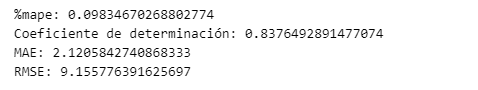

El modelo de ejecución ha dado mejores resultados que el modelo de entrenamiento y podemos establecer que es un buen modelo predictivo, que no está sobre ajustado porque los datos los resultados de entrenamiento y producción son muy parecido. 